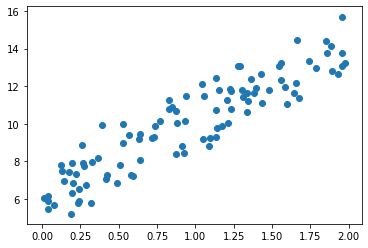

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X ,y)

In [0]:
#비용함수 정의
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

In [0]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)

  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [0]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0과 w1을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
    
  return w1, w0

In [38]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print ("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print ('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


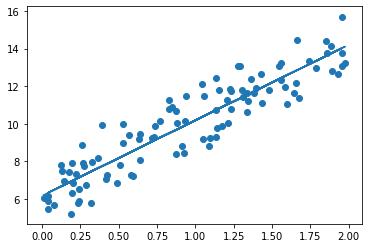

In [39]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [0]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)

    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [42]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print ("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print ('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937
